<a href="https://colab.research.google.com/github/SlavaKulik/machine_learning/blob/main/practical_task_1_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
credit = pd.read_csv('/content/drive/My Drive/ccFraud.csv')
credit_1 = pd.read_csv('/content/drive/My Drive/ccFraud.csv')
print(credit.shape)
print(credit.columns)
credit.head()

(10000000, 9)
Index(['custID', 'gender', 'state', 'cardholder', 'balance', 'numTrans',
       'numIntlTrans', 'creditLine', 'fraudRisk'],
      dtype='object')


,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
0,1,1,35,1,3000,4,14,2,0
1,2,2,2,1,0,9,0,18,0
2,3,2,2,1,0,27,9,16,0
3,4,1,15,1,0,12,0,5,0
4,5,1,46,1,0,11,16,7,0


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
 #   Column        Dtype
---  ------        -----
 0   custID        int64
 1   gender        int64
 2   state         int64
 3   cardholder    int64
 4   balance       int64
 5   numTrans      int64
 6   numIntlTrans  int64
 7   creditLine    int64
 8   fraudRisk     int64
dtypes: int64(9)
memory usage: 686.6 MB


In [5]:
#кількість операцій по картках та між операціях для клієнтів різної статі
credit.groupby(['gender'])[list(['numTrans', "numIntlTrans"])].sum()

,numTrans,numIntlTrans
gender,,
1,178792453,25004185
2,110559418,15467714


In [6]:
#інформація щодо різних значень гендер та кількості шахраїв та нешахраїв
credit.groupby(['gender'])['fraudRisk'].value_counts()

gender  fraudRisk
1       0            5853053
        1             325178
2       0            3550933
        1             270836
Name: fraudRisk, dtype: int64

In [7]:
#кількості шахраїв та нешахраїв в залежності від кредитної лінії
pd.crosstab(credit['creditLine'], credit['fraudRisk']).T

creditLine,1,2,3,4,5,6,7,8,9,10,...,66,67,68,69,70,71,72,73,74,75
fraudRisk,,,,,,,,,,,,,,,,,,,,,
0,105367,1030216,1287769,1152472,958379,780867,636901,517494,425436,349827,...,868,813,785,716,665,597,576,455,423,10290
1,367,5436,10443,13933,16379,18583,19950,21350,22224,22671,...,1345,1358,1255,1229,1221,1191,1137,1045,1073,25778


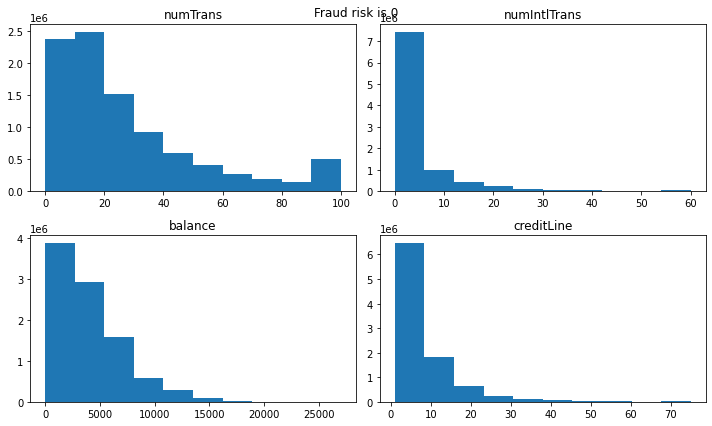

In [8]:
#гістрограма для кількості транзакцій numTrans для шахраїв та нешахраїв
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
fig.suptitle('Fraud risk is 0')
axs[0][0].set_title('numTrans')
axs[0][0].hist(credit[credit['fraudRisk']==0]['numTrans'])
axs[0][1].set_title('numIntlTrans')
axs[0][1].hist(credit[credit['fraudRisk']==0]['numIntlTrans'])
axs[1][0].set_title('balance')
axs[1][0].hist(credit[credit['fraudRisk']==0]['balance'])
axs[1][1].set_title('creditLine')
axs[1][1].hist(credit[credit['fraudRisk']==0]['creditLine'])
plt.tight_layout()

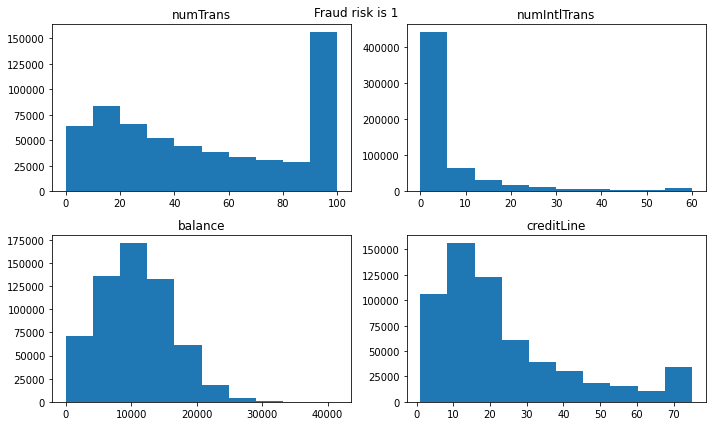

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
fig.suptitle('Fraud risk is 1')
axs[0][0].set_title('numTrans')
axs[0][0].hist(credit[credit['fraudRisk']==1]['numTrans'])
axs[0][1].set_title('numIntlTrans')
axs[0][1].hist(credit[credit['fraudRisk']==1]['numIntlTrans'])
axs[1][0].set_title('balance')
axs[1][0].hist(credit[credit['fraudRisk']==1]['balance'])
axs[1][1].set_title('creditLine')
axs[1][1].hist(credit[credit['fraudRisk']==1]['creditLine'])
plt.tight_layout()

In [11]:
#основні статисики за ознаками
credit.agg({'balance':['min','max','mean','var','std'], 'numTrans':['min','max','mean','var','std'], 'numIntlTrans':['min','max','mean','var','std']})

,balance,numTrans,numIntlTrans
min,0.000000e+00,0.000000,0.000000
max,4.148500e+04,100.000000,60.000000
mean,4.109920e+03,28.935187,4.047190
var,1.597479e+07,705.103287,74.011095
std,3.996847e+03,26.553781,8.602970


In [12]:
#побудова матриці кореляції
credit.corr()

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
custID,1.000000,-0.000523,-0.000123,-0.000006,0.000264,0.000610,0.000054,0.000084,-0.000427
gender,-0.000523,1.000000,0.000279,0.000204,-0.000386,-0.000187,0.000007,0.000042,0.037425
state,-0.000123,0.000279,1.000000,-0.000459,-0.000896,0.000151,-0.000301,-0.000263,-0.022295
cardholder,-0.000006,0.000204,-0.000459,1.000000,-0.000458,0.000243,0.000272,-0.000132,0.011154
balance,0.000264,-0.000386,-0.000896,-0.000458,1.000000,0.000445,0.000271,0.263583,0.412075
numTrans,0.000610,-0.000187,0.000151,0.000243,0.000445,1.000000,-0.000281,0.000317,0.222751
numIntlTrans,0.000054,0.000007,-0.000301,0.000272,0.000271,-0.000281,1.000000,-0.000279,0.039588
creditLine,0.000084,0.000042,-0.000263,-0.000132,0.263583,0.000317,-0.000279,1.000000,0.377001
fraudRisk,-0.000427,0.037425,-0.022295,0.011154,0.412075,0.222751,0.039588,0.377001,1.000000


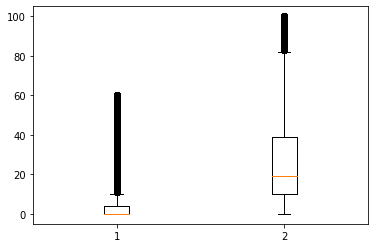

In [13]:
#діаграмма "ящик з вусами"
plt.boxplot([credit['numIntlTrans'],credit['numTrans']])
plt.show()

In [14]:
#масштабування ознак спосіб 1
from sklearn.preprocessing import StandardScaler
cols=['balance','numTrans','numIntlTrans']

scale = StandardScaler().fit_transform(credit[cols].values)
credit[cols]=scale
credit.head(10)

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
0,1,1,35,1,-0.277699,-0.939045,1.156904,2,0
1,2,2,2,1,-1.028291,-0.750748,-0.470441,18,0
2,3,2,2,1,-1.028291,-0.072878,0.575709,16,0
3,4,1,15,1,-1.028291,-0.637769,-0.470441,5,0
4,5,1,46,1,-1.028291,-0.675429,1.389382,7,0
5,6,2,44,2,0.359303,-0.298835,-0.470441,13,0
6,7,1,3,1,-0.527896,0.454354,-0.470441,1,0
7,8,1,10,1,0.476896,-0.336494,-0.121724,6,0
8,9,2,32,1,-0.420812,-0.939045,0.691948,22,0
9,10,1,23,1,-1.028291,-0.411813,6.038939,5,0


In [19]:
#масштабування ознак спосіб 2
from sklearn.preprocessing import Normalizer
cols=['balance','numTrans','numIntlTrans']

normal = Normalizer().fit_transform(credit_1[cols].values)
credit_1[cols]=normal
credit_1.head(10)

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
0,1,1,35,1,0.999988,0.001333,0.004667,2,0
1,2,2,2,1,0.000000,1.000000,0.000000,18,0
2,3,2,2,1,0.000000,0.948683,0.316228,16,0
3,4,1,15,1,0.000000,1.000000,0.000000,5,0
4,5,1,46,1,0.000000,0.566529,0.824042,7,0
5,6,2,44,2,0.999993,0.003786,0.000000,13,0
6,7,1,3,1,0.999790,0.020496,0.000000,1,0
7,8,1,10,1,0.999994,0.003324,0.000499,6,0
8,9,2,32,1,0.999990,0.001647,0.004119,22,0
9,10,1,23,1,0.000000,0.306009,0.952029,5,0
